In [2]:
import numpy as np
import matplotlib.pyplot as plt

f_2= [25,30,50] # (mm)
lambda_big= 1/600 # Largeur de pas du réseau de diffraction (mm)
N= 5/lambda_big # Nombre de périodes du réseau de diffraction (mm)
lambda_red, lambda_blue=780e-6, 380e-6 # longeur d'onde pour 400 nm et 700 nm en mm


pixel=5.20e-3 # (mm)
nb_pixel_x=1280
nb_pixel_y=1024
largeur_x, largeur_y =pixel*nb_pixel_x, pixel*nb_pixel_y


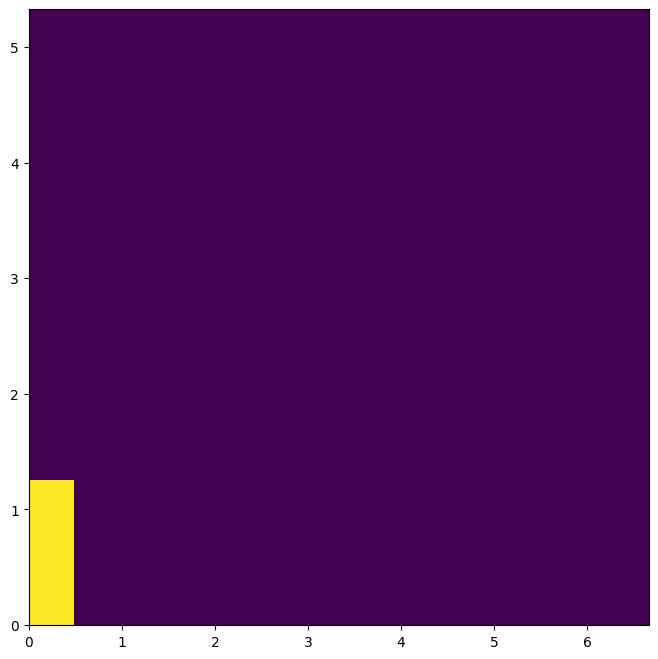

In [7]:
def rect(z,A,B):
    """Fonction rectangulaire"""
    return np.where(np.abs(A*(z+B)) <= 1/2, 1, 0)

x = np.linspace(0, largeur_x, nb_pixel_x)  # grandeur physique d'une ligne de pixels sur la caméra en x
y = np.linspace(0, largeur_y, nb_pixel_y)  # grandeur physique d'une colonne de pixels sur la caméra en y

X, Y = np.meshgrid(x, y)

F_1=50
F_2=25
b=5
a=2

U2=rect(Y,F_1/(b*F_2),0)*rect(X,F_1/(a*F_2),lambda_red/(F_2*lambda_big))

plt.figure(figsize=(8,8))
plt.pcolormesh(x,y,U2)
plt.show()

In [6]:
delta_lambda_list=[]
for f in f_2:
    pos_red=(lambda_red*f)/lambda_big
    pos_blue=(lambda_blue*f)/lambda_big
    delta_lambda=abs(pos_red-pos_blue)
    delta_lambda_list.append(delta_lambda)


print(np.array(delta_lambda_list)-largeur_x)

[-0.656  0.544  5.344]


On choisi alors une longueur focale de 25 mm pour $f_2$. On optimise la résolution du spectromètre $\lambda_2-\lambda_1=\frac{a\Lambda}{f_1}$. Puisque $f_1$ est inversement proportionnelle à la résolution, on choisi $f_1=50$ mm. 